# Universal Studio Reviews 

#### Import Relevant Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import pandas_profiling as pp
import os
import sys
import csv
import re

from collections import defaultdict, Counter

%matplotlib inline

%reload_ext autoreload
%autoreload 2

sb.set()
sb.set_style("darkgrid")

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

#### Load Data

In [56]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Reviews of Universal Studios\universal_studio_branches.csv")
df.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


#### Statistical Data

In [57]:
df.shape

(50904, 6)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50904 entries, 0 to 50903
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviewer      50904 non-null  object 
 1   rating        50904 non-null  float64
 2   written_date  50904 non-null  object 
 3   title         50904 non-null  object 
 4   review_text   50904 non-null  object 
 5   branch        50904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [59]:
df.describe().round()

,rating
count,50904.0
mean,4.0
std,1.0
min,1.0
25%,4.0
50%,5.0
75%,5.0
max,5.0


In [60]:
df.isnull().sum()

reviewer        0
rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

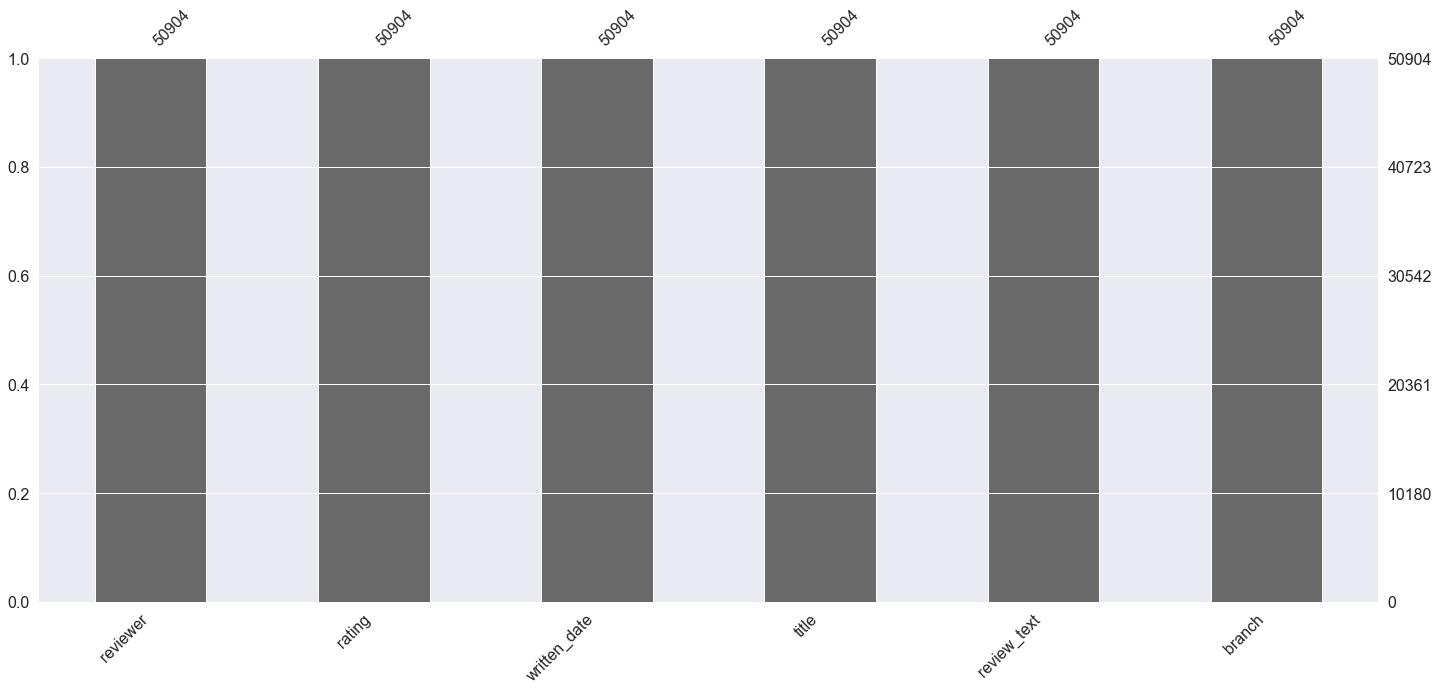

In [61]:
msno.bar(df)

In [62]:
df[df.duplicated() == True].count()

reviewer        45
rating          45
written_date    45
title           45
review_text     45
branch          45
dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

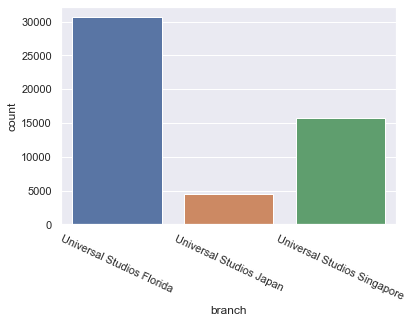

In [63]:
sb.countplot(df["branch"])
plt.xticks(rotation=-25)

#### Data Cleaning and Manipulation

Remove Special string character with Regression Analysis

In [64]:
df.head(3)

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida


In [65]:
for i in range(len(df['review_text'])):
    df['review_text'][i]=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', df['review_text'][i], flags=re.MULTILINE)

<ipython-input-65-c1368a751382>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'][i]=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', df['review_text'][i], flags=re.MULTILINE)


In [66]:
df.head(3)

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida


In [67]:
for i in range(len(df['review_text'])):
    df['review_text'][i] = re.sub('@([a-zA-Z])+','', df['review_text'][i], flags = re.MULTILINE)

<ipython-input-67-e15c721da071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'][i] = re.sub('@([a-zA-Z])+','', df['review_text'][i], flags = re.MULTILINE)


In [68]:
df.drop(columns = ["reviewer", "written_date", "branch"], inplace = True)

In [75]:
df.sample(frac = 1).head()

,rating,title,review_text
26954,5,Great rides!!,This was my first visit to this place and had ...
27715,4,"good park, no line ups,",Went to Universal April 28-May 4. The line ups...
46973,3,Not much for adults,"There was so much to do... For kids, battlesta..."
42965,5,Clean,I just thought it will be dirty because of so ...
28288,3,"Universal Studios: crowded, overpriced, overal...",We bought the express pass to not waste time w...


In [70]:
df["rating"] = df["rating"].astype(int)
df.head()

,rating,title,review_text
0,2,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...
1,1,Food is hard to get.,The food service is horrible. I’m not reviewin...
2,2,Disappointed,I booked this vacation mainly to ride Hagrid m...
3,4,My opinion,When a person tries the test seat for the ride...
4,5,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo..."


In [84]:
class Category():
    exceptional = "Exceptional"
    average = "Average"
    excellent = "Excellent"

class Rating():
    def __init__(self, rate):
        self.rate = rate
        
    def get_rate(self):
        if self.rate <= 2:
            return Category.exceptional
        elif self.rate == 3:
            return Category.average
        elif self.rate > 3:
            return Category.excellent

In [89]:
df["remark"] = df["rating"].apply(Rating)

In [82]:
df.sample(frac = 1).head()

,rating,title,review_text,remark
12970,5,First Time At Universal,This was my first trip to Universal in Florida...,<__main__.Rating object at 0x000002A6942F2B80>
33669,3,Terribly overcrowded. Queues so long.,Got there early but still huge crowds. Express...,<__main__.Rating object at 0x000002A694500AC0>
9564,3,too many stores,too many stores and not enough shows and rides...,<__main__.Rating object at 0x000002A69426BA00>
914,4,Universal Studios and Islands of Adventure,We mainly went to the parks to see the Harry P...,<__main__.Rating object at 0x000002A691A2F250>
1921,5,friends and family,"we had a blast in the park, we made it to ever...",<__main__.Rating object at 0x000002A6941471F0>
